In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train3_f = 'train3_oddYr.txt'
test3_f = 'test3_oddYr.txt'
train5_f = 'train5_oddYr.txt'
test5_f = 'test5_oddYr.txt'

train3 = np.loadtxt(train3_f, dtype=int)
test3 = np.loadtxt(test3_f, dtype=int)
train5 = np.loadtxt(train5_f, dtype=int)
test5 = np.loadtxt(test5_f, dtype=int)

In [3]:
label_train3 = np.zeros(train3.shape[0])
label_train5 = np.ones(train5.shape[0])

In [4]:
# concatenate the label and the 64 * 1 vector together for random shuffling
train3 = np.concatenate((train3,label_train3[:,np.newaxis]),axis = 1)
train5 = np.concatenate((train5,label_train5[:,np.newaxis]),axis = 1)

In [5]:
#extract x and y from training samples
train = np.concatenate((train3,train5))
np.random.shuffle(train)
x_train = train[:,:-1]
y_train = train[:,-1]
print(x_train.shape,y_train.shape)

(1400, 64) (1400,)


In [6]:
#initialization of w
w = np.random.randn(64,1) / 100

In [7]:
# define sigmoid function
def sigmoid(w,x):
    z = np.dot(x,w)
    return(1/(1+np.exp(-z)))

### For this problem, I will use the ML estimator to estimate the parameters w:
* For the loss function of this binary-classification problem, I use the cross entropy loss;
* The optimization algorithm I use is gradient descent;
* Maximum iterations of this algorithm is 1000, learning rate = 0.2 / 1400;
* Every 10 iterations, the loss and the corresponding error rate will be updated and recorded.

In [8]:
alpha = 0.2 / x_train.shape[0]
max_iter = 5000
loss_list,error_list = [],[]
best_w = np.zeros((64,1))
best_error = 1
for i in range(max_iter):
    prob = sigmoid(w,x_train)
    temp = np.log(prob) * y_train[:,np.newaxis] + np.log(1-prob) * (1-y_train)[:,np.newaxis]
    loss = -1 / x_train.shape[0] * np.sum(temp,axis = 0)
    # collect data for plotting
    if i%10 == 0:
        loss_list.append(loss)
        prob_cur = sigmoid(w,x_train)
        y_cur = np.where(prob_cur > 0.5,1,0)
        error_rate = np.sum(np.absolute(y_train[:,np.newaxis] - y_cur),axis = 0) / x_train.shape[0]
        error_list.append(error_rate)
        # update the best parameters based on error rate after each 10 iterations
        if error_rate[0] < best_error:
            best_error = error_rate[0]
            best_w = w
    # print out the loss after each 500 iterations
    if i%500 == 0:
        print('after ',str(i),' iterations, the loss is ',str(loss[0]))
    temp1 = (y_train[:,np.newaxis] - prob) * x_train
    gradient = np.sum(temp1,axis = 0)
    w = w + alpha * gradient[:,np.newaxis]
loss_list = np.array(loss_list)
error_list = np.array(error_list)

after  0  iterations, the loss is  0.6991974340784461
after  500  iterations, the loss is  0.14737106123464255
after  1000  iterations, the loss is  0.13366840726085244
after  1500  iterations, the loss is  0.12786033528483737
after  2000  iterations, the loss is  0.12450174368367661
after  2500  iterations, the loss is  0.122290719187885
after  3000  iterations, the loss is  0.12072989505285713
after  3500  iterations, the loss is  0.11957851817371558
after  4000  iterations, the loss is  0.11870271882514127
after  4500  iterations, the loss is  0.11802115764098803


In [9]:
x = np.linspace(0,5000,500)

### As we can see from the plot, as the number of iterations increase, the loss generally decreases and converges. Also the error rate generally decreases along with the increase of iteration number.

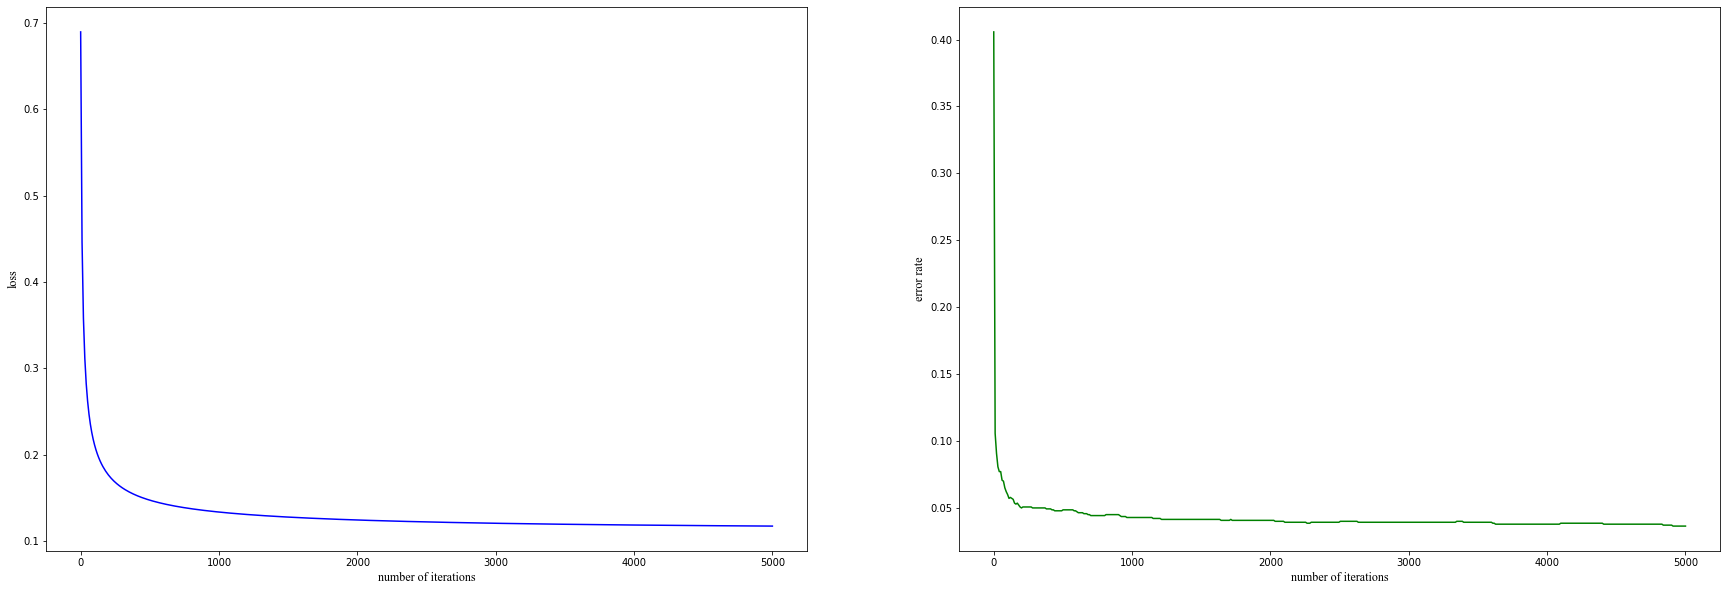

In [16]:
fig=plt.figure(figsize=(30,10))
fig.add_subplot(1,2,1)
plt.plot(x,loss_list,'b')
plt.xlabel('number of iterations', fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.ylabel('loss', fontdict={'family' : 'Times New Roman', 'size'   : 12})
fig.add_subplot(1,2,2)
plt.plot(x,error_list,'g')
plt.xlabel('number of iterations', fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.ylabel('error rate', fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.show()

In [11]:
# optimized weight vector
for i in range(best_w.shape[0]):
    print('w%d = %.3f'%(i,best_w[i][0]),end = '\t')
    if i % 3 == 2:
        print()

w0 = -0.887	w1 = -1.389	w2 = -1.148	
w3 = -1.095	w4 = -0.747	w5 = -0.764	
w6 = 0.813	w7 = 1.698	w8 = 0.070	
w9 = -0.089	w10 = 0.199	w11 = -0.069	
w12 = -0.331	w13 = 0.679	w14 = -1.210	
w15 = -1.275	w16 = 3.199	w17 = 1.362	
w18 = 1.346	w19 = 0.223	w20 = 0.619	
w21 = -1.904	w22 = -2.382	w23 = -2.418	
w24 = 0.785	w25 = 0.409	w26 = 0.549	
w27 = -0.267	w28 = -0.489	w29 = -2.143	
w30 = 0.349	w31 = -0.029	w32 = 0.470	
w33 = 1.038	w34 = 0.044	w35 = -0.314	
w36 = -0.625	w37 = -0.209	w38 = -0.393	
w39 = -0.325	w40 = 1.115	w41 = -0.186	
w42 = -0.313	w43 = -0.058	w44 = 0.106	
w45 = -0.799	w46 = 0.756	w47 = -1.400	
w48 = 1.359	w49 = -0.591	w50 = 1.237	
w51 = 0.551	w52 = 0.399	w53 = -0.288	
w54 = 0.218	w55 = -1.125	w56 = 0.520	
w57 = 0.273	w58 = 0.872	w59 = 1.648	
w60 = 0.476	w61 = 0.626	w62 = 0.515	
w63 = -0.459	

In [13]:
# test data
label_test3 = np.zeros(test3.shape[0])
label_test5 = np.ones(test5.shape[0])
test3 = np.concatenate((test3,label_test3[:,np.newaxis]),axis = 1)
test5 = np.concatenate((test5,label_test5[:,np.newaxis]),axis = 1)
test = np.concatenate((test3,test5))
np.random.shuffle(test)
x_test = test[:,:-1]
y_test = test[:,-1]
print(x_test.shape,y_test.shape)

(800, 64) (800,)


In [14]:
# using the optimized weight vector to predict test data sample
prob_test = sigmoid(best_w,x_test)
pred_test = np.where(prob_test > 0.5,1,0)
error_rate = np.sum(np.absolute(y_test[:,np.newaxis] - pred_test),axis = 0) / x_test.shape[0]
print("testing error rate ",str(error_rate[0]))

testing error rate  0.06
